### Omar Abdelmotaleb
### Assignment 3: K-mean clustering
### CS-559-B
### I pledge my honor that I have abided by the Stevens Honor System.

---

# Problem 1: K-means algorithm

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
# https://medium.com/geekculture/implementing-k-means-clustering-with-k-means-initialization-in-python-7ca5a859d63a

# The K-means algorithm follows the following steps:

# 1. Pick n data points that will act as the initial centroids.
# 2. Calculate the Euclidean distance of each data point from each of the centroid points selected in step 1.
# 3. Form data clusters by assigning every data point to whichever centroid it has the smallest distance from.
# 4. Take the average of each formed cluster. The mean points are our new centroids.

X = np.array([
[5.9, 3.2],
[4.6, 2.9],
[6.2, 2.8],
[4.7, 3.2],
[5.5, 4.2],
[5.0, 3.0],
[4.9, 3.1],
[6.7, 3.1],
[5.1, 3.8],
[6.0, 3.0]
])

u1 = np.array([6.2, 3.2]) # Red
u2 = np.array([6.6, 3.7]) # Green
u3 = np.array([6.5, 3.0]) # Blue
centroids = np.array([u1, u2, u3])
# plt.scatter(X[:,0], X[:,1], s=50)
# plt.show()

In [22]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [23]:
# Index 0 = Red, 1 = Green, 2 = Blue

def calculate_centroids(data_v, centroids_v, output=False):
    
    clusters = {0: [], 1: [], 2: []}
    
    for val_data in data_v:
        # Calculate euclidean distance of each point from each centroid point
        d = euclidean(val_data, centroids_v)

        # Form data clusters, assigning each point to the centroid of smallest distance
        clusters[np.argmin(d)].append(val_data)
        if output: 
            print(f"Data: {val_data} with distances {d}. Min: {np.min(d)} at index {np.argmin(d)}")

    if output:
        print(f"Clusters: {clusters}") 

    # Take the averages of each cluster. Becomes the new centroids.
    red_cluster     = np.mean(clusters[0], axis=0)
    green_cluster   = np.mean(clusters[1], axis=0)
    blue_cluster    = np.mean(clusters[2], axis=0)

    centroids_ret   = np.array([red_cluster, green_cluster, blue_cluster])

    if output:
        print(f"Centroids: {centroids_ret}")

    return clusters, centroids_ret

---

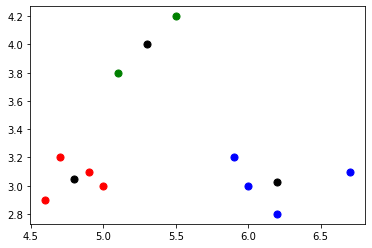

In [24]:
# Define number of iterations
iterations = 2

for i in range(iterations):
    clusters, centroids = calculate_centroids(data_v=X, centroids_v=centroids, output=False)
    # print(f"Iteration {i}, clusters: \n{clusters} \ncentroids: \n{centroids}")

# Alternate between colors dependent on cluster (0=red,1=green,2=blue)
colors = ["r", "g", "b"]
c = 0
for points in clusters.values():
    for point in points:  
        x = point[0]
        y = point[1]
        plt.scatter(x, y, s=50, color = colors[c])
    c += 1
    
plt.scatter(centroids[:,0], centroids[:,1], s=50, color="k")
plt.show()

# Problem 4: Neural Networks

---

In [26]:
import pandas as pd

In [27]:
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris = pd.read_csv("iris.data", names = col_names)
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris.sample(frac=1), test_size=0.2)

epochs = 5

In [58]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        
        # From input to hidden
        self.W1 = np.matrix(np.random.randn(hidden_size, input_size))
        self.b1 = np.matrix(np.zeros((hidden_size, 1)))

        # From hidden to output
        self.W2 = np.matrix(np.random.randn(output_size, hidden_size))
        self.b2 = np.matrix(np.zeros((output_size, 1)))

    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x))

    def forward(self, x):
        self.Z1 = np.dot(self.W1, x) + self.b1
        self.h1 = self.softmax(self.Z1)
        
        self.Z2 = np.dot(self.W2, x) + self.b2
        self.h2 = self.softmax(self.Z2)
        
        self.y_hat = self.h2

        return self.y_hat

    def backwards(self, x, y, learning_rate = 0.1):
        # Output to hidden
        self.dZ2 = self.y_hat - y
        self.dW2 = np.dot(self.dZ2, self.h1.T)
        self.db2 = self.dZ2

        # Hidden to input
        self.dZ1 = self.W2.T * (np.dot(np.dot(self.dZ2, self.h1.T), (1 - self.h1)))
        self.dW1 = self.dZ1 * x.T
        self.db1 = self.dZ1

        # Update weights and biases
        self.W1 -= (learning_rate * self.dW1)
        self.b1 -= (learning_rate * self.db1)
        self.W2 -= (learning_rate * self.dW2)
        self.b2 -= (learning_rate * self.db2)

def target_matrix(target):
    if target == "Iris-setosa":
        # target = 1
        return [1, 0, 0]
    elif target == "Iris-versicolor":
        # target = 2
        return [0, 1, 0]
    elif target == "Iris-virginica":
        return [0, 0, 1]
    
    return [0, 0, 0]

class_labels = {
    0: "Iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-virginica"
}

nn = NeuralNetwork(4, 4, 3)

training_accuracy = []

for _, row in train.iterrows():
    # Extract input and target vectors from iris
    data = list(row)
    input_vector = np.matrix(data[:4]).T
    target = data[4:][0]
    
    target = np.matrix(target_matrix(target)).T

    for i in range(epochs):
        prediction = nn.forward(input_vector)
        nn.backwards(input_vector, target)

    label_pred = class_labels[np.argmax(prediction)]

    if label_pred == data[4:][0]:
        training_accuracy.append(1)
    else:
        training_accuracy.append(0)

print("Training accuracy: ", sum(training_accuracy) / len(training_accuracy))

testing_accuracy = []

for _, row in test.iterrows():
    data = list(row)
    input_vector = np.matrix(data[:4]).T
    target = data[4:][0]

    for i in range(epochs):
        prediction = nn.forward(input_vector)

    label_pred = class_labels[np.argmax(prediction)]

    if label_pred == target:
        testing_accuracy.append(1)
    else:
        testing_accuracy.append(0)

print("Testing accuracy: ", sum(testing_accuracy) / len(testing_accuracy))

Training accuracy:  0.9083333333333333
Testing accuracy:  0.7


### Part 2

In [77]:
# Followed a geeksforgeeks implementation
# https://www.geeksforgeeks.org/implementing-neural-networks-using-tensorflow/
 
import tensorflow as tf

df = pd.read_csv("iris.data", names = col_names)
labels_class = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
df['Class'] = [labels_class[thing] for thing in df["Class"].tolist()]

train_df = df.sample(frac=0.8, random_state=4)
val_df = df.drop(train_df.index)

max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)
 
range = max_val - min_val
train_df = (train_df - min_val)/(range)
 
val_df =  (val_df- min_val)/range

X_train = train_df.drop('Class',axis=1)
X_val = val_df.drop('Class',axis=1)
y_train = train_df['Class']
y_val = val_df['Class']

input_shape = [X_train.shape[1]]


model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=3)
])

model.compile(optimizer='adam', loss='mae') 
losses = model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs)

# model.summary()
print(model.predict(X_val.iloc[0:10, :]))
print(y_val.iloc[0:10])

Train on 120 samples, validate on 30 samples
Epoch 1/5
120/120 [==============================] - 0s 3ms/sample - loss: 0.5555 - val_loss: 0.6015
Epoch 2/5
120/120 [==============================] - 0s 37us/sample - loss: 0.5435 - val_loss: 0.5889
Epoch 3/5
120/120 [==============================] - 0s 33us/sample - loss: 0.5312 - val_loss: 0.5774
Epoch 4/5
120/120 [==============================] - 0s 33us/sample - loss: 0.5194 - val_loss: 0.5668
Epoch 5/5
120/120 [==============================] - 0s 37us/sample - loss: 0.5078 - val_loss: 0.5565
[[0.04800151 0.00853997 0.02093817]
 [0.03536437 0.01631628 0.0149915 ]
 [0.05579869 0.01303262 0.01539   ]
 [0.03586452 0.01067142 0.02052179]
 [0.06403191 0.00779816 0.0194311 ]
 [0.0396423  0.01705617 0.01365887]
 [0.05123662 0.01220628 0.01684815]
 [0.05474155 0.01251015 0.01605627]
 [0.04252658 0.00909382 0.02115475]
 [0.01442299 0.07184982 0.04126272]]
0     0.0
8     0.0
21    0.0
30    0.0
32    0.0
38    0.0
40    0.0
44    0.0
49   